In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import IPython

---
## Question 1:

Read chapter 4 from Haykin’s book (2nd edition), starting from section 4.1 to 4.6(including 4.6). Summarize or sketch your insights in mind-map or an outline or a summary.

---
## Question 2:

For this task you have to program the back-propogation (BP) for multi layered perceptron (MLP). Design your implementation for general NN with arbitrary many hidden layers. The test case is as follows:  2-2-1 multi layered perceptron (MLP) with sigmoid activation function on XOR data.

In [91]:
class NeuralNetwork():
    """
    3 layer neural network with 1 input layer, 1 hidden layer, 
    1 output layer...
    2-2-1 Neural Network..
    """
    def __init__(self, num_hidden_neurons = 2, learning_rate = 1, epochs = 50000,
                 num_inputs = 2, zero_weight_init = False, epsilon= 1e-5):
        # Layer 0 --> input, Layer 1 --> hidden, Layer 2 --> output
        if zero_weight_init == False:
            np.random.seed(0)
            # weights randomly initialized...
            self.w_layer01 = np.random.rand(num_inputs, num_hidden_neurons)
            self.w_layer12 = np.random.rand(num_hidden_neurons, 1)
        else:
            # weights initialized to zero...
            self.w_layer01 = np.zeros((num_inputs, num_hidden_neurons))
            self.w_layer12 = np.zeros((num_hidden_neurons, 1))
            
        self.num_hidden_neurons = num_hidden_neurons
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epochs = epochs
        
    def non_linearity(self, value, derivative = False):
        if derivative == True: # return slope of sigmoid..
            return value*(1. - value)
        # included to avoid overflow in numpy exponent..
        value = np.array(value, dtype = np.float128)
        value = np.clip( value, -500, 500 )
        # return sigmoid activation value...
        return 1./(1. + np.exp(-value)) 
        
    def train(self, input_array, output_array):
        iteration, prev_error = 0, 1.
        while(True):
            layer0 = input_array
            layer1_local_field = input_array.dot(self.w_layer01)
            layer1_output = self.non_linearity(layer1_local_field)
            
            layer2_local_field = layer1_output.dot(self.w_layer12)
            layer2_output = self.non_linearity(layer2_local_field)
        
            layer2_error = -(output_array - layer2_output)
            layer2_delta = layer2_error * self.non_linearity(
                layer2_error, derivative = True)
        
            layer1_error = layer2_delta.dot(self.w_layer12.T)
            layer1_delta = layer1_error * self.non_linearity(
                layer1_error, derivative = True)
            
            # update weights based on error and slope of sigmoid...
            self.w_layer12 -= self.learning_rate * (
                layer1_output.T.dot(layer2_delta))
            self.w_layer01 -= self.learning_rate * (
                layer0.T.dot(layer1_delta))
            
            training_error = np.mean(np.abs(layer2_error))
            check_convergence = prev_error - training_error
            
            if iteration % 1000 == 0:
                print 'Epoch: ', iteration, '......', 'Training Error: ', (
                    training_error)
            if iteration > self.epochs or check_convergence < self.epsilon:
                break
            
            prev_error = training_error.copy()
            iteration += 1
                
        # training error at the end of epochs is returned...
        print '-----------------------------------------------------------'
        if iteration > self.epochs:
            print 'Max epochs reached...'
        else:
            print 'Epoch: ', iteration, '......', 'Training Error: ', (
                    training_error)
            print 'Error has converged...'
        print '-----------------------------------------------------------'
        return training_error
                
    def predict(self, input_array, desired_array):
        layer0 = input_array
        layer1_local_field = input_array.dot(self.w_layer01)
        layer1_output = self.non_linearity(layer1_local_field)
        
        layer2_local_field = layer1_output.dot(self.w_layer12)
        layer2_output = self.non_linearity(layer2_local_field)
        
        layer2_error = layer2_output - desired_array
        
        # average generalization error is returned..
        return np.mean(np.abs(layer2_error))

In [87]:
# XOR..
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0.01, 0.01, 0]).reshape(-1, 1)

print input_data.shape
print labels.shape

(4, 2)
(4, 1)


## 2) a) Experiments with initial weights

### i) Train the network with zero initial weights i.e. $w_{ij} = 0$.

In [92]:
network = NeuralNetwork(zero_weight_init= True, epsilon= 1e-5)
error = network.train(input_data, labels)

Epoch:  0 ...... Training Error:  0.495
-----------------------------------------------------------
Epoch:  991 ...... Training Error:  0.0166549966497
Error has converged...
-----------------------------------------------------------


## ii) Train with random initial weights:

In [93]:
network = NeuralNetwork(zero_weight_init= False, epsilon= 1e-5)
error = network.train(input_data, labels)

Epoch:  0 ...... Training Error:  0.659731235149
-----------------------------------------------------------
Epoch:  820 ...... Training Error:  0.0111095907678
Error has converged...
-----------------------------------------------------------


## Comparision and Comments on convergence:

Weights initialized to zero:

    Convergence is slower (takes 991 epochs).

Weights initialized to random values:

    Convergence is faster (takes 820 epochs).
    
---

## b. Experiment with different learning rates e.g. 0.1, 0.3, 0.5, 0.9:

In [106]:
learning_rates = [0.1, 0.3, 0.5, 0.9]
converged_error = list()
for rate in learning_rates:
    network = NeuralNetwork(learning_rate=rate)
    converged_error.append(network.train(input_data, labels))

print 'Errors after convergence: '
print '[learning_rate, converged error]'
result = np.array(zip(learning_rates, converged_error))
print result

Epoch:  0 ...... Training Error:  0.659731235149
Epoch:  1000 ...... Training Error:  0.0425660236693
-----------------------------------------------------------
Epoch:  1809 ...... Training Error:  0.0298313544562
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.659731235149
Epoch:  1000 ...... Training Error:  0.0218313086386
-----------------------------------------------------------
Epoch:  1229 ...... Training Error:  0.0191584170654
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.659731235149
Epoch:  1000 ...... Training Error:  0.0156958393345
-----------------------------------------------------------
Epoch:  1032 ...... Training Error:  0.0153686300313
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.659731235149
---------------------------------------------------------

## Compare the convergence and plot some resulting surfaces:

## Plot:

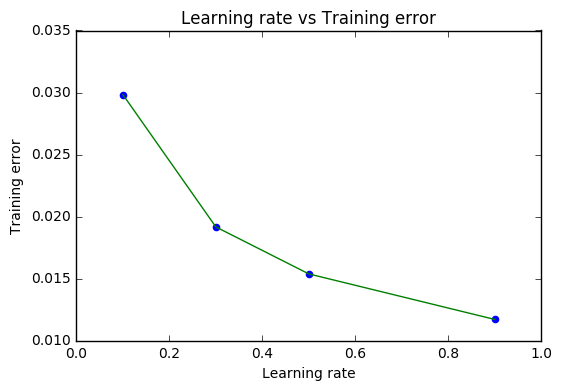

In [95]:
plt.plot(result[:,0], result[:,1], color = 'g')
plt.xlabel('Learning rate')
plt.ylabel('Training error')
plt.title('Learning rate vs Training error')
plt.scatter(result[:,0], result[:,1], color = 'b')
plt.show()

## Comparision of convergence:

---

## Question 3:

Investigate the use of back-propagation learning using a sigmoidal nonlinearity to achieve one-to-one mappings, as described here:

For each mapping, do the following:

1. Set up two sets of data, one for network training, and the other for testing.

2. Use the training data set to compute the synaptic weights of the network, assumed to have a single hidden layer.

3. Evaluate the computation accuracy of the network by using the test data. Use a single hidden layer but with a variable number of hidden neurons. Investigate how the network performance is affected by varying the size of the hidden layer.

In [126]:
## Required functions....

def plot_results(hidden_neurons, train_error, test_error, 
                 plot_title, x_axis_lim = (None, None)):
    print 'Training error after convergence: '
    print '[Hidden neurons, converged training error]'
    print np.array(zip(hidden_neurons, train_error))
    print '--------------------------------------------------------------------'
    print 'Test error: '
    print '[Hidden neurons, test error]'
    print np.array(zip(hidden_neurons, test_error))

    plt.plot(hidden_neurons, train_error, color = 'r', label= "Training error")
    plt.plot(hidden_neurons, test_error, color = 'g', label= "Test error")
    plt.scatter(hidden_neurons, train_error, color = 'c', label= "Training error")
    plt.scatter(hidden_neurons, test_error, color = 'm', label= "Test error")
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Error')
    plt.title(plot_title)
    plt.xlim(x_axis_lim[0], x_axis_lim[1])
    plt.legend()
    plt.show()

def obtain_performance(x, y, hidden_neurons, normalizer= 1):
    data = np.hstack((x, y))/normalizer
    np.random.seed(0)
    np.random.shuffle(data)
    train_data, test_data = np.vsplit(data, [data.shape[0]*8/10])

    train_error = []
    test_error = []

    for number in hidden_neurons:
        network = NeuralNetwork(num_inputs= 1,
                            num_hidden_neurons= number)
        train_error.append(network.train(train_data[:,:-1],
                                     train_data[:,-1:]))
        test_error.append(network.predict(test_data[:,:-1],
                                     test_data[:,-1:]))
        
    return train_error, test_error

In [124]:
hidden_neurons = [1, 2, 3, 4, 5]

## 1) Reciprocal 
$$F(x) = \frac{1}{x}; 1<= x <=100$$

Epoch:  0 ...... Training Error:  0.599407540604
-----------------------------------------------------------
Epoch:  385 ...... Training Error:  0.00773676418759
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.658887285404
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.000906007756188
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.715819051878
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.000535458756801
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.79711377251
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.000569887738658
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Trainin

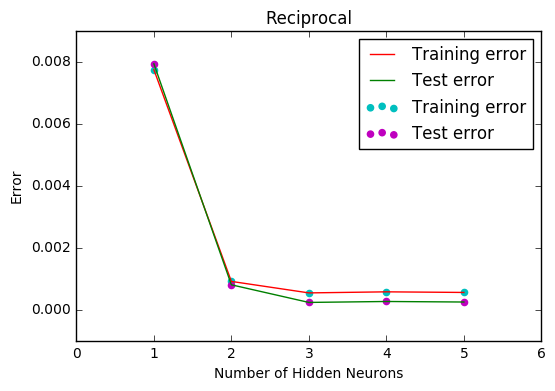

In [127]:
reciprocal_x = np.arange(1, 101, dtype= np.float32).reshape(-1, 1)
reciprocal_y = 1/reciprocal_x
train_error_r, test_error_r = obtain_performance(
    reciprocal_x, reciprocal_y, hidden_neurons, normalizer= 100)
plot_results(hidden_neurons, train_error_r, test_error_r, 'Reciprocal')

## 2) Log_10
$$F(x) = log_{10}x; 1<= x <=10$$

Epoch:  0 ...... Training Error:  0.53014911191
-----------------------------------------------------------
Epoch:  157 ...... Training Error:  0.0262834114171
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.591338095427
-----------------------------------------------------------
Epoch:  103 ...... Training Error:  0.030196794913
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.649293702376
-----------------------------------------------------------
Epoch:  68 ...... Training Error:  0.0303977714013
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.731407255769
-----------------------------------------------------------
Epoch:  51 ...... Training Error:  0.0300091598793
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Er

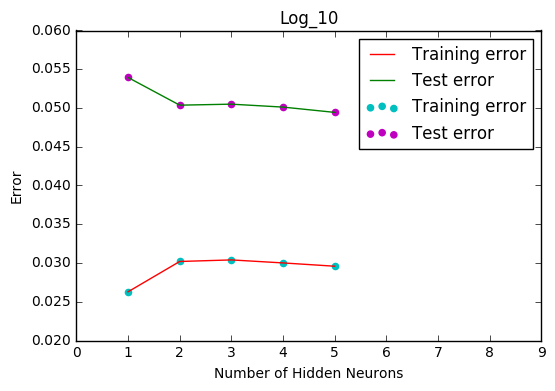

In [128]:
log_x = np.arange(1, 11, dtype= np.float32).reshape(-1, 1)
log_y = np.log10(log_x)
train_error_l, test_error_l = obtain_performance(
    log_x, log_y, hidden_neurons, normalizer= 10)
plot_results(hidden_neurons, train_error_l, test_error_l,
             'Log_10', x_axis_lim= (0, 9))

## 3) Exponential 
$$F(x) = exp(-x); 1<= x <=10$$

Epoch:  0 ...... Training Error:  0.599774359737
-----------------------------------------------------------
Epoch:  42 ...... Training Error:  0.11822533237
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.660963343253
-----------------------------------------------------------
Epoch:  644 ...... Training Error:  0.011475203667
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.718918950202
-----------------------------------------------------------
Epoch:  557 ...... Training Error:  0.00978920443467
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.801032503595
-----------------------------------------------------------
Epoch:  507 ...... Training Error:  0.00877501340695
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training 

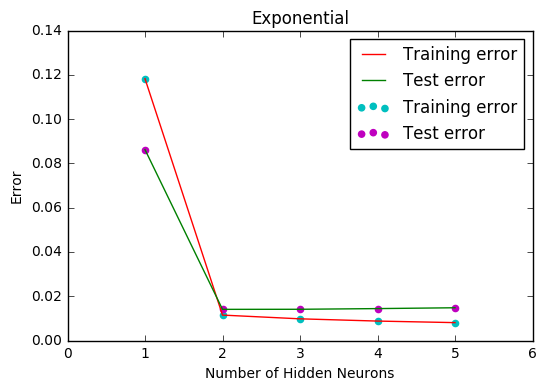

In [119]:
exp_x = np.arange(1, 11, dtype= np.float32).reshape(-1, 1)
exp_y = np.exp(-exp_x)
train_error_e, test_error_e = obtain_performance(
    exp_x, exp_y, hidden_neurons, normalizer= 10)
plot_results(hidden_neurons, train_error_e, test_error_e, 'Exponential')

## 4) Sinusoid 
$$F(x) = sin(x); 0<= x <=\frac{\pi}{2}$$

Epoch:  0 ...... Training Error:  0.203275728398
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.173967597856
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.257132127488
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.29794791007
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.314043537717
-----------------------------------------------------------
Epoch:  2 ...... Training Error:  0.397062250848
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.3953455152
-----------------------------------------------------------
Epoch:  18 ...... Training Error:  0.0657462314498
Error has converged...
-----------------------------------------------------------
Epoch:  0 ...... Training Error:  0.4

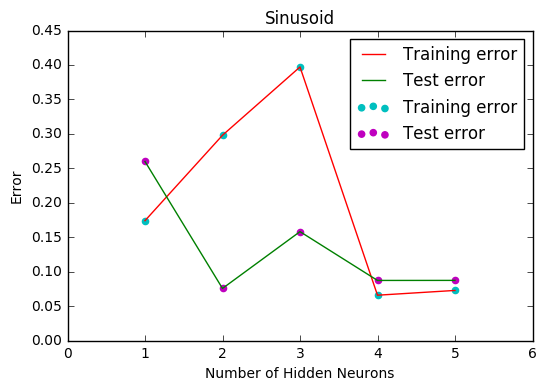

In [120]:
sin_x = np.linspace(0, np.pi/2, dtype= np.float32).reshape(-1, 1)
sin_y = np.sin(sin_x)
train_error_s, test_error_s = obtain_performance(
    sin_x, sin_y, hidden_neurons, normalizer= np.pi/2)
plot_results(hidden_neurons, train_error_s, test_error_s, 'Sinusoid')

---